# 敵対的サンプルについての調査


# 準備

In [103]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
# from caffe2.python.hypothesis_test_util import tensor

In [104]:
df_orig = pd.read_csv('data/df_orig.csv')
df_orig.head()

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,target
0,0,0.0,6.0,1169.0,4.0,4.0,4.0,4.0,67.0,2.0,1.0,1.0,0.0,1.0
1,1,1.0,48.0,5951.0,0.0,2.0,2.0,2.0,22.0,1.0,1.0,0.0,0.0,0.0
2,2,3.0,12.0,2096.0,0.0,3.0,2.0,3.0,49.0,1.0,2.0,0.0,0.0,1.0
3,3,0.0,42.0,7882.0,0.0,3.0,2.0,4.0,45.0,1.0,2.0,0.0,0.0,1.0
4,4,0.0,24.0,4870.0,0.0,2.0,3.0,4.0,53.0,2.0,2.0,0.0,0.0,0.0


In [105]:
# データフレームについて
print(df_orig.shape)
print(df_orig.columns)
print(df_orig.dtypes)

(1000, 14)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'target'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
target                    float64
dtype: object


In [106]:
df_lowprofool = pd.read_csv("data/lowprofool.csv")
df_lowprofool.head(10)

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,orig_pred,adv_pred,iters
0,685,0.997658,0.828838,0.362960,0.991477,0.468093,1.000000,0.610332,0.249117,0.000000,0.735690,1.000000,0.000000,1.0,0.0,2.0
1,727,0.004270,0.193441,0.085945,0.000000,0.513290,1.000000,1.000000,0.105984,0.094393,0.000000,0.092095,0.089810,0.0,1.0,6.0
2,30,0.332212,0.220030,0.098564,0.742885,0.249799,0.632240,0.353695,0.287091,0.218329,0.202072,1.000000,0.000000,1.0,0.0,10.0
3,376,0.999967,0.207935,0.119707,0.000000,0.000000,0.326682,0.834429,0.270760,0.305997,0.211505,0.000000,0.000000,1.0,0.0,2.0
4,66,0.985959,0.129198,0.111973,0.000000,0.268750,0.337460,0.335278,0.157925,0.008992,0.002347,0.000000,0.002152,1.0,0.0,0.0
5,965,0.328615,0.386398,0.066916,0.993392,0.494088,0.958287,0.431906,0.180352,0.000000,0.000000,0.000000,0.000000,1.0,0.0,13.0
6,963,0.996728,0.304682,0.150327,0.462636,0.900469,0.739923,0.225979,0.271496,0.976182,0.000000,1.000000,0.050883,1.0,0.0,24.0
7,61,0.319655,0.183002,0.037505,1.000000,1.000000,0.895664,1.000000,0.646693,0.000276,0.000000,0.564606,0.000000,1.0,0.0,23.0
8,282,0.665122,0.205682,0.067414,1.000000,0.750157,0.987933,0.999995,0.555603,0.000000,0.267610,0.000000,0.000000,1.0,0.0,0.0
9,268,0.000000,0.126495,0.478574,0.000000,1.000000,0.033157,1.000000,0.450279,0.400138,0.000000,1.000000,1.000000,0.0,1.0,6.0


In [107]:
# データフレームについて
print(df_lowprofool.shape)
print(df_lowprofool.columns)
print(df_lowprofool.dtypes)

(10, 16)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
orig_pred                 float64
adv_pred                  float64
iters                     float64
dtype: object


In [108]:
df_deepfool = pd.read_csv("data/deepfool.csv")
df_deepfool.head(10)

,Unnamed: 0,checking_status,duration,credit_amount,savings_status,employment,installment_commitment,residence_since,age,existing_credits,num_dependents,own_telephone,foreign_worker,orig_pred,adv_pred,iters
0,685,0.962067,0.841160,0.378787,0.966561,0.488562,1.000000,0.987962,0.259458,0.000000,0.983815,1.000000,0.000000,1.0,0.0,80.0
1,727,0.042614,0.151559,0.120060,0.000000,0.554851,0.994205,1.000000,0.093444,0.271584,0.000000,0.040744,0.076084,0.0,1.0,146.0
2,30,0.309898,0.319152,0.096251,0.702180,0.257140,0.605491,0.625299,0.261603,0.094186,0.045560,0.996273,0.000000,1.0,0.0,204.0
3,376,0.985767,0.240529,0.144570,0.000000,0.001041,0.319562,0.684708,0.259617,0.325940,0.031351,0.000000,0.000000,1.0,0.0,76.0
4,66,0.992075,0.128061,0.111331,0.000000,0.265540,0.336834,0.334849,0.162700,0.007263,0.001844,0.000000,0.001858,1.0,0.0,37.0
5,965,0.277871,0.413978,0.054236,0.958421,0.478509,0.933573,0.126884,0.138400,0.000000,0.000000,0.001871,0.000000,1.0,0.0,302.0
6,963,0.983670,0.378096,0.208091,0.518475,0.738938,0.648498,0.320185,0.220932,0.449055,0.005526,1.000000,0.087787,1.0,0.0,366.0
7,61,0.176840,0.242984,0.000000,1.000000,1.000000,0.857817,0.966911,0.676682,0.265976,0.000000,0.901351,0.000000,1.0,0.0,391.0
8,282,0.665876,0.205891,0.065383,1.000000,0.749881,0.999904,0.999566,0.546236,0.000000,0.000598,0.000000,0.000000,1.0,0.0,2.0
9,268,0.055832,0.043544,0.486067,0.010473,1.000000,0.017715,0.968235,0.465674,0.054572,0.000000,1.000000,1.000000,0.0,1.0,150.0


In [109]:
# データフレームについて
print(df_deepfool.shape)
print(df_deepfool.columns)
print(df_deepfool.dtypes)

(10, 16)
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')
Unnamed: 0                  int64
checking_status           float64
duration                  float64
credit_amount             float64
savings_status            float64
employment                float64
installment_commitment    float64
residence_since           float64
age                       float64
existing_credits          float64
num_dependents            float64
own_telephone             float64
foreign_worker            float64
orig_pred                 float64
adv_pred                  float64
iters                     float64
dtype: object


In [110]:
print(df_orig.columns)
print(df_lowprofool.columns)

Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'target'],
      dtype='object')
Index(['Unnamed: 0', 'checking_status', 'duration', 'credit_amount',
       'savings_status', 'employment', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents',
       'own_telephone', 'foreign_worker', 'orig_pred', 'adv_pred', 'iters'],
      dtype='object')


In [111]:
df = pd.read_csv("data/df.csv")
# df = df[]
df.head()
df.shape

(600, 14)

## IDで各モデルの出力結果を比較する

df_compareのmodel_idについて
- 0: df_orig
- 1: df_lowprofool
- 2: df_deepfool

In [112]:
# model_idの作成
df_orig['model_id'] = 0
df_orig.rename(columns={'target': 'orig_pred'}, inplace=True)
df_orig['adv_pred'] = df_orig['orig_pred']
df_orig['iters'] = 0
df_lowprofool['model_id'] = 1
df_deepfool['model_id'] = 2

df_mix = pd.concat([df_orig, df_lowprofool, df_deepfool], sort=True, ignore_index=True)
df_mix

,Unnamed: 0,adv_pred,age,checking_status,credit_amount,duration,employment,existing_credits,foreign_worker,installment_commitment,iters,model_id,num_dependents,orig_pred,own_telephone,residence_since,savings_status
0,0,1.0,67.000000,0.000000,1169.000000,6.000000,4.000000,2.000000,0.000000,4.000000,0.0,0,1.000000,1.0,1.000000,4.000000,4.000000
1,1,0.0,22.000000,1.000000,5951.000000,48.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,0.0,0.000000,2.000000,0.000000
2,2,1.0,49.000000,3.000000,2096.000000,12.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,0.000000,3.000000,0.000000
3,3,1.0,45.000000,0.000000,7882.000000,42.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,0.000000,4.000000,0.000000
4,4,0.0,53.000000,0.000000,4870.000000,24.000000,2.000000,2.000000,0.000000,3.000000,0.0,0,2.000000,0.0,0.000000,4.000000,0.000000
5,5,1.0,35.000000,3.000000,9055.000000,36.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,2.000000,1.0,1.000000,4.000000,4.000000
6,6,1.0,53.000000,3.000000,2835.000000,24.000000,4.000000,1.000000,0.000000,3.000000,0.0,0,1.000000,1.0,0.000000,4.000000,2.000000
7,7,1.0,35.000000,1.000000,6948.000000,36.000000,2.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,1.0,1.000000,2.000000,0.000000
8,8,1.0,61.000000,3.000000,3059.000000,12.000000,3.000000,1.000000,0.000000,2.000000,0.0,0,1.000000,1.0,0.000000,4.000000,3.000000
9,9,0.0,28.000000,1.000000,5234.000000,30.000000,0.000000,2.000000,0.000000,4.000000,0.0,0,1.000000,0.0,0.000000,2.000000,0.000000


# 敵対的サンプルの特徴量の分布

In [113]:
df_30 = df_mix[df_mix['Unnamed: 0'] == 30]
df_30

,Unnamed: 0,adv_pred,age,checking_status,credit_amount,duration,employment,existing_credits,foreign_worker,installment_commitment,iters,model_id,num_dependents,orig_pred,own_telephone,residence_since,savings_status
30,30,1.0,36.000000,1.000000,1913.000000,18.000000,1.000000,1.000000,0.0,3.000000,0.0,0,1.000000,1.0,1.000000,3.000000,3.000000
1002,30,0.0,0.287091,0.332212,0.098564,0.220030,0.249799,0.218329,0.0,0.632240,10.0,1,0.202072,1.0,1.000000,0.353695,0.742885
1012,30,0.0,0.261603,0.309898,0.096251,0.319152,0.257140,0.094186,0.0,0.605491,204.0,2,0.045560,1.0,0.996273,0.625299,0.702180


In [114]:
class GermanNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(GermanNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, H)
        self.linear3 = torch.nn.Linear(H, D_out)
        self.relu = torch.nn.ReLU()
        self.softmax = torch.nn.Softmax(dim=0)

    def forward(self, x):
        h1 = self.relu(self.linear1(x))
        h2 = self.relu(self.linear2(h1))
        h3 = self.relu(self.linear2(h2))
        h4 = self.relu(self.linear2(h3))
        h5 = self.relu(self.linear2(h4))
        h6 = self.relu(self.linear2(h5))
        a3 = self.linear3(h6)
        y = self.softmax(a3)
        return y

In [115]:
model_path = 'model_data/model.pth'

D_in = 12
H = 100
D_out = 2

model = GermanNet(D_in, H, D_out)

if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()
else:
    print("Model file not found.")



# 既存のコードを一部変更

In [116]:
from tqdm import tqdm
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn
from torch.autograd import Variable
import keras
from Adverse import lowProFool, deepfool
from Metrics import *

In [117]:
from research import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


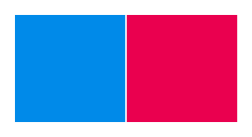

In [118]:
# Retina display
%config InlineBackend.figure_format ='retina'
pd.set_option('display.max_columns', 500)
tqdm.pandas()
np.set_printoptions(suppress=True)

%load_ext autoreload
%autoreload 2

ccolors = ["#008ae9", "#ea004f"]
sns.set_palette(ccolors)
sns.palplot(sns.color_palette())

SEED = 0
DATASET = 'credit-g'

/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/sklearn/datasets/openml.py:305: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


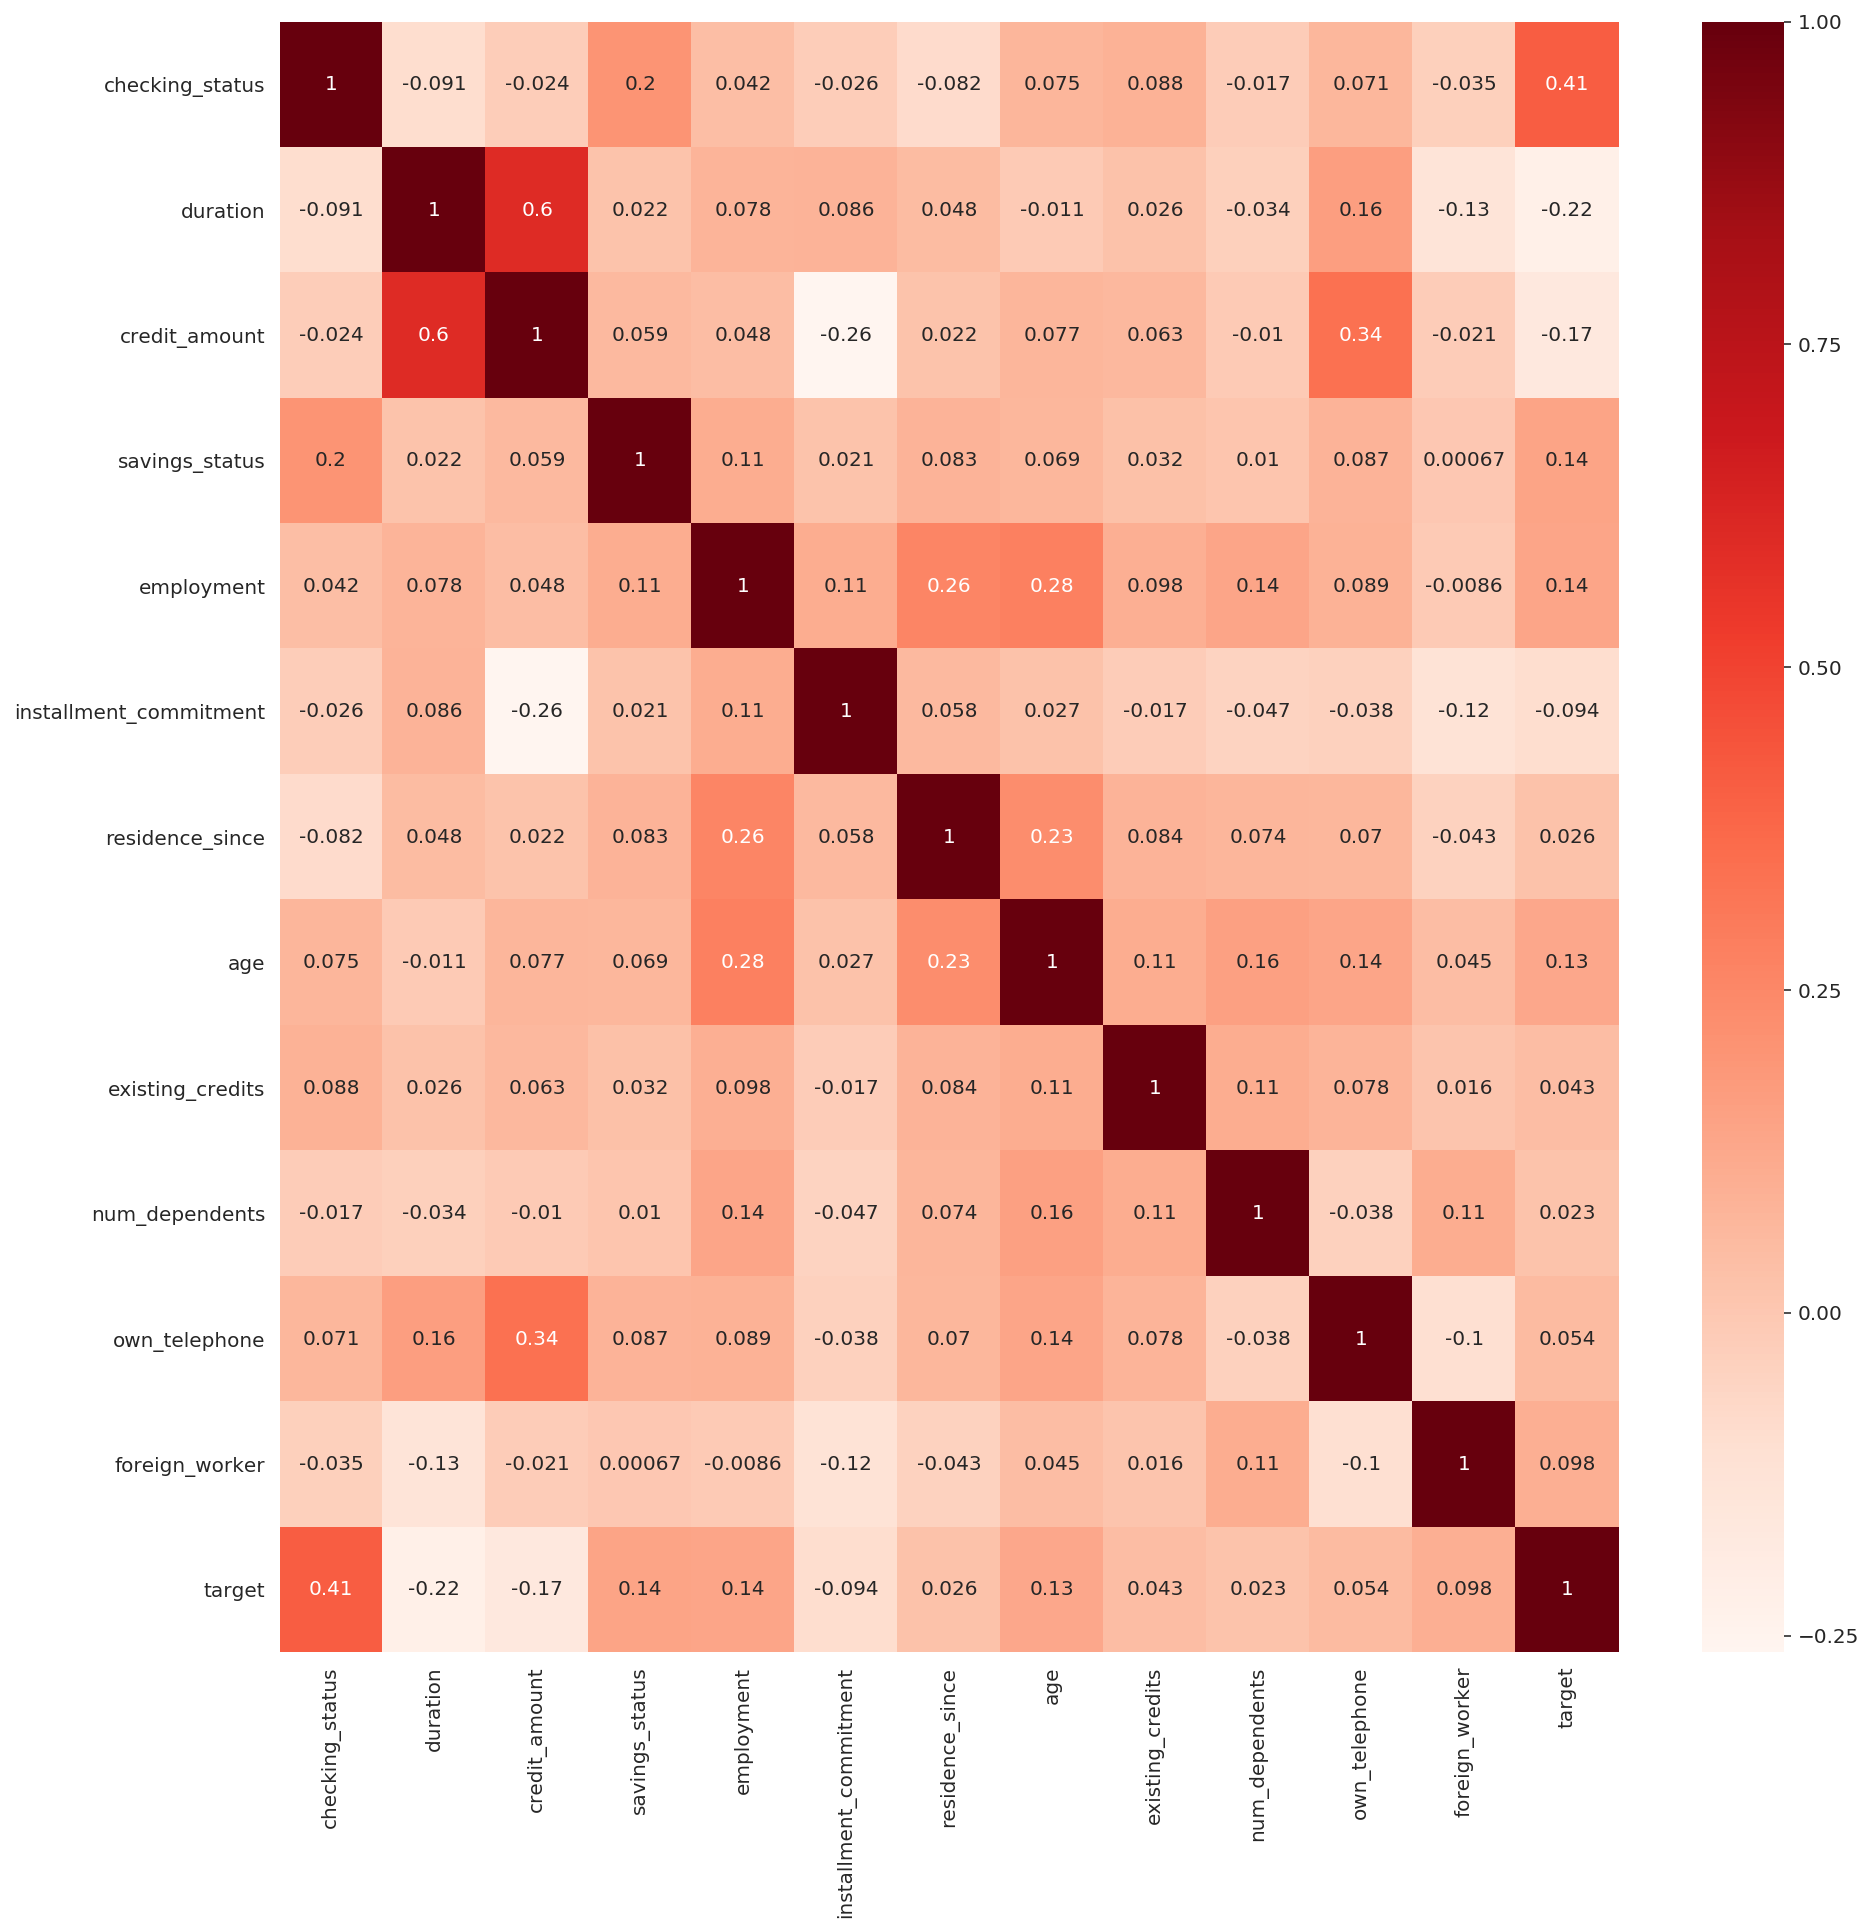

Input size: 12, Output size: 2
> epoch 0	Loss 0.00692	Acc 0.51667
> epoch 50	Loss 0.00648	Acc 0.73000
> epoch 100	Loss 0.00489	Acc 0.76000
> epoch 150	Loss 0.00457	Acc 0.77333
> epoch 200	Loss 0.00410	Acc 0.81333
> epoch 250	Loss 0.00335	Acc 0.84667
> epoch 300	Loss 0.00252	Acc 0.89667
> epoch 350	Loss 0.00180	Acc 0.92333


In [119]:
# i. データの読み込み
# Load initial dataset
df_orig, target, feature_names = get_df(DATASET)

# ii. バランス
# Balance dataset classes
df = balance_df(df_orig.copy(), target, SEED)

# 2. 関数の呼び出し
bounds = get_bounds(df_orig)

# Normalize the data
scaler, df, bounds = normalize(df, target, feature_names, bounds)

# Compute the weihts modelizing the expert's knowledge
weights = get_weights(df, target)

# Split df into train/test/valid
df_train, df_test, df_valid = split_train_test_valid(df)

# Build experimenation config
config = {'Dataset'     : 'credit-g',
         'MaxIters'     : 20000,
         'Alpha'        : 0.001,
         'Lambda'       : 8.5,
         'TrainData'    : df_train,
         'TestData'     : df_test,
         'ValidData'    : df_valid,
         'Scaler'       : scaler,
         'FeatureNames' : feature_names,
         'Target'       : target,
         'Weights'      : weights,
         'Bounds'       : bounds}

# Train neural network
model = get_model(config)
config['Model'] = model

In [186]:
# Compute accuracy on test set
y_true = df_test[target]
x_test = torch.FloatTensor(df_test[feature_names].values)
y_pred_tensor = model(x_test) # こいつを少数で返すように変更する
y_pred = y_pred_tensor.detach().numpy()
print('y_pred\n', y_pred)
print('y_true\n', y_true)
print('y_pred:\n', y_pred.shape)
print('y_true:\n', y_true.shape)

y_pred
 [[0.00002    0.99998   ]
 [0.98966473 0.01033524]
 [0.999706   0.00029405]
 [0.01711552 0.9828844 ]
 [0.00000347 0.99999654]
 [0.9998272  0.00017277]
 [0.00349799 0.99650204]
 [0.01292131 0.98707867]
 [0.00477344 0.9952265 ]
 [0.99874383 0.00125618]
 [0.95060307 0.04939695]
 [0.02038273 0.9796173 ]
 [0.9997279  0.00027205]
 [0.99848086 0.0015192 ]
 [0.04024158 0.9597584 ]
 [0.00006951 0.9999305 ]
 [0.02675198 0.97324806]
 [0.01102148 0.98897856]
 [0.00535386 0.99464613]
 [0.03223013 0.96776986]
 [0.8838741  0.11612584]
 [0.398189   0.60181093]
 [0.00205742 0.9979426 ]
 [0.02882272 0.9711773 ]
 [0.29450825 0.7054917 ]
 [0.999811   0.00018905]
 [0.00010151 0.99989843]
 [0.97470903 0.02529094]
 [0.99756014 0.0024399 ]
 [0.9925321  0.00746796]
 [0.00000281 0.99999714]
 [0.99688065 0.00311934]
 [0.9847171  0.01528287]
 [0.00025375 0.99974626]
 [0.6442556  0.3557445 ]
 [0.08860836 0.9113916 ]
 [0.99695265 0.00304735]
 [0.18711129 0.8128887 ]
 [0.53412503 0.465875  ]
 [0.05919423 0.94

### 混合行列

In [187]:
from sklearn.metrics import confusion_matrix

In [188]:
# accuracy
y_pred2 = np.argmax(y_pred_tensor.detach().numpy(), axis=1)
print("Accuracy score on test data", accuracy_score(y_true, y_pred2))

Accuracy score on test data 0.712


In [189]:
# 混合行列
cm = confusion_matrix(y_true, y_pred2)
TN, FP, FN, TP = cm.ravel()
total = TN + FP + FN + TP

# 割合計算
TN_ratio = TN / total
FP_ratio = FP / total
FN_ratio = FN / total
TP_ratio = TP / total

# 結果を表示
print(f"TP ratio: {TP_ratio:.2f}")
print(f"TN ratio: {TN_ratio:.2f}")
print(f"FP ratio: {FP_ratio:.2f}")
print(f"FN ratio: {FN_ratio:.2f}")

TP ratio: 0.36
TN ratio: 0.35
FP ratio: 0.15
FN ratio: 0.14


In [190]:
table = f"""
|\t\t\t|審査通過\t|失敗\t|
|予測成功\t|TP:{TP_ratio:.2f}\t|TN:{TN_ratio:.2f}|
|予測失敗\t|FP:{FP_ratio:.2f}\t|FN:{FN_ratio:.2f}|
"""

print(table)


|			|審査通過	|失敗	|
|予測成功	|TP:0.36	|TN:0.35|
|予測失敗	|FP:0.15	|FN:0.14|



### ヒストグラム

In [196]:
import pandas as pd

# Convert y_true to a NumPy array
y_true_array = y_true.to_numpy()

# Extract the id from the index of y_true
ids = y_true.index.to_numpy()

# Extract the probability of y_pred being 1
y_pred_prob_1 = y_pred[:, 1]

# Create a DataFrame with the combined data
df_combined = pd.DataFrame({
    'id': ids,
    'y_true': y_true_array,
    'y_pred_prob_1': y_pred_prob_1
})

print(df_combined.head())

    id  y_true  y_pred_prob_1
0  791     1.0       0.999980
1   80     0.0       0.010335
2  291     0.0       0.000294
3  717     1.0       0.982884
4  781     1.0       0.999997


In [203]:
# Determine the predicted class based on y_pred_prob_1
df['y_pred'] = (df['y_pred_prob_1'] >= 0.5).astype(float)

# Add a flag for TP, TN, FP, FN
def get_flag(row):
    if row['y_true'] == 1.0 and row['y_pred'] == 1.0:
        return 'TP'
    elif row['y_true'] == 0.0 and row['y_pred'] == 0.0:
        return 'TN'
    elif row['y_true'] == 0.0 and row['y_pred'] == 1.0:
        return 'FP'
    elif row['y_true'] == 1.0 and row['y_pred'] == 0.0:
        return 'FN'

df['flag'] = df.apply(get_flag, axis=1)
# Create a DataFrame
df = pd.DataFrame(df)

# One-hot encode the 'flag' column
df_encoded = pd.get_dummies(df, columns=['flag'])
print(df_encoded)

      id  y_true  y_pred_prob_1  y_pred  flag_FN  flag_FP  flag_TN  flag_TP
0    791     1.0       0.999980     1.0        0        0        0        1
1     80     0.0       0.010335     0.0        0        0        1        0
2    291     0.0       0.000294     0.0        0        0        1        0
3    717     1.0       0.982884     1.0        0        0        0        1
4    781     1.0       0.999997     1.0        0        0        0        1
5    329     1.0       0.000173     0.0        1        0        0        0
6    795     1.0       0.996502     1.0        0        0        0        1
7    594     0.0       0.987079     1.0        0        1        0        0
8    279     1.0       0.995227     1.0        0        0        0        1
9    517     0.0       0.001256     0.0        0        0        1        0
10   227     0.0       0.049397     0.0        0        0        1        0
11   178     1.0       0.979617     1.0        0        0        0        1
12   287    

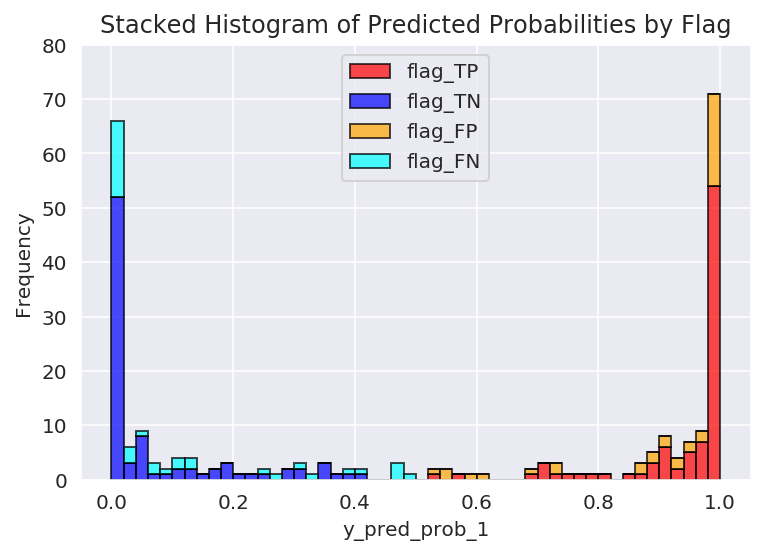

In [217]:
import matplotlib.pyplot as plt

# Create a histogram for each flag category
flags = ['flag_TP', 'flag_TN', 'flag_FP', 'flag_FN']
colors = ['red', 'blue', 'orange', 'cyan']

# Prepare data for the histogram
data = [df_encoded[df_encoded[flag] == 1]['y_pred_prob_1'] for flag in flags]

# Plot the stacked histogram
plt.hist(data, bins=50, edgecolor='k', alpha=0.7, color=colors, label=flags, stacked=True)
plt.ylim(0, 80)

plt.title('Stacked Histogram of Predicted Probabilities by Flag')
plt.xlabel('y_pred_prob_1')
plt.ylabel('Frequency')
plt.legend()
plt.show()